<a href="https://colab.research.google.com/github/Fuenfgeld/ATeamDatenmanagementUndArchivierung/blob/lknegendorf_patch/IMECOS_master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kursarbeit Datenmanagement und -Archivierung WS 20/21
## Master-Code [IMECOS-Projekt](https://github.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung)


---



## Initialisierung für Projekt-Administratoren

#### Datenbankinitialisierung & Quelldatenimport ([Wiki/Quelldatenmodell](https://github.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/wiki/Quelldatenmodell#datenbank-implementierung))

In [ ]:
# initialize the database, see import statements in *implementation.py
import requests
exec(requests.get('https://raw.githubusercontent.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/main/src/source_database_implementation.py').text)

Mounted at /content/gdrive
Successfully Connected to SQLite
Successfully created tables in the database
Successfully inserted source data
Source database ready for work
  
      conn    -    is the name of the connection object
      cur     -    is the name of the cursor
      
      



*   Verbindung zu Googledrive herstellen (Ablageort der CSV-Dateien)
*   Verbindung zu SQLite herstellen
*   Datebankinitialisierung im *Memory*
*   [Quelldaten](https://github.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/wiki/Quelldatenmodell)import
*   Ausgabe der Connection- und Cursor-Syntax


---






### Datenqualität I - Datenexploration ([Wiki/Datenqualität](https://github.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/wiki/Datenqualit%C3%A4t#identifikation-von-redundanzen-und-unstimmigkeiten---data-clearing))
Die Folgenden beiden Zellen sind optional zur Ausführung der `data_clearing_SQL_queries`.

Legende zu den GitHub-Issues zur Datenqualität:


[#12](https://github.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/issues/12), 
[#13](https://github.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/issues/13),
[#14](https://github.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/issues/14),
[#15](https://github.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/issues/15),
[#30](https://github.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/issues/30).

In [ ]:
# decions about the design of the star scheme have followed several deeper looks into the data. Included here for documentation purpose.
# EXECUTION OF THIS CELL IS OPTIONAL!
# uncomment the following two lines after one another to see the documentation of this step.

# exec(requests.get('https://raw.githubusercontent.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/main/tools/data_clearing_SQL_queries.py').text)
# data_clearing_queries(30)


---





### ETL-Prozess ([Wiki/ETL-Prozess](https://github.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/wiki/Datenbereinigung-im-ETL-Prozess))

In [ ]:
# CREATE VIEW for central table  (but with DESCRIPTIONS)
cur.executescript(requests.get('https://raw.githubusercontent.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/main/tools/ETL_create_view_central.sql').text)
conn.commit()
# Perform Extraction, Transformation and Loading into new database
exec(requests.get('https://raw.githubusercontent.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/main/tools/ETL_process.py').text)

Successfully Extracted Data
Successfully Transformed Data
Successfully Connected to SQLite Public Data Warehouse
Loaded research data
encounters :  -8064858177655843232
patients :  -6782052882837843746
payers :  7404035236410964453
code_master :  -6726061372865899500
Successfully finished ETL process
Research database ready for work
  
      conn_new    -    is the name of the connection object
      cur_new     -    is the name of the cursor
      
      



*   View auf Quelldatenbank erstellen ([ETL_create_view_central.sql](https://github.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/blob/main/tools/ETL_create_view_central.sql))
*   Datenextraktion ([ETL_process.py](https://github.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/blob/main/tools/ETL_process.py))
*   Verbindung zu SQLite herstellen
*   Datebankinitialisierung in öffentlichem Google Drive ([IMECOS_public/imecos_public.db](https://drive.google.com/file/d/1cnzmvXIE7CDIULh8hIHPCZJKEI4RKTiX/view?usp=sharing))
*   Anzeige der erstellten Post-ETL Tabellen inkl. Hash-Summen
*   Ausgabe der neuen Connection- und Cursor-Syntax


---


## Initialisierung für die Öffentlichkeit
Vor Ausführung ist eine Verlinkung der Datenbank in ein Google Drive notwendig.
### Siehe Hinweise unter [System-Umgebung](https://github.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/wiki/System-Umgebung) 

In [ ]:
import requests
exec(requests.get('https://raw.githubusercontent.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/main/src/public_datawarehouse_connection.py').text)


*   Verbindung zu SQLite herstellen
*   Datebank in öffentlichem Google Drive ([IMECOS_public/imecos_public.db](https://drive.google.com/file/d/1cnzmvXIE7CDIULh8hIHPCZJKEI4RKTiX/view?usp=sharing)) verbinden
*   Anzeige der Post-ETL Tabellen inkl. Hash-Summen:

Tabelle | Hash-Summe
----- | -----
encounters | 2156497301953685746
patients | -7379940451828567556
payers | 7404035236410964453
code_master | -6726061372865899500

*   Ausgabe der neuen Connection- und Cursor-Syntax


---


## Deskriptive Analysen des Forschungsdatensatzes

Import der [Seaborn](https://seaborn.pydata.org/)-Umgebungen zur grafischen Analyse & Befüllen der Dataframes:

In [ ]:
# import plot libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# save tables from DB into dataframe
encounters = pd.read_sql_query("SELECT * FROM encounters", conn_new)
patients = pd.read_sql_query("SELECT * FROM patients", conn_new)

### Datenqualität II - Entfernung von Extremwerten ([Wiki/Datenqualität](https://github.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/wiki/Datenqualit%C3%A4t#identifikation-von-fehlern-und-ausrei%C3%9Fern-in-der-datenbasis---preliminary-data-analysis))

patients.COV_EXP_RATO




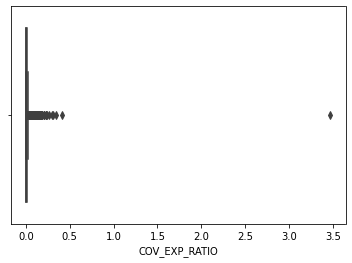

In [ ]:
# BOXPLOT of patients COV_EXP_RATIO
print("""patients.COV_EXP_RATO

""")
sns.boxplot(x=patients["COV_EXP_RATIO"])
plt.savefig('gdrive/Shareddrives/IMECOS/plots/COV_EXP_outlier.png')

patients.COV_EXP_RATO nach Entfernung von Extremwerten




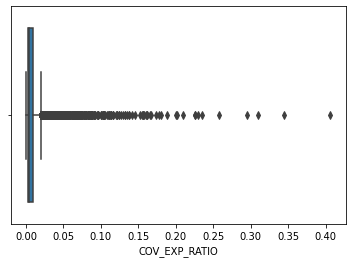

In [ ]:
# remove outlier data from data warehouse via a SQL Delete Script
cur_new.executescript(requests.get('https://raw.githubusercontent.com/Fuenfgeld/ATeamDatenmanagementUndArchivierung/main/tools/data_quality_delete_outlier.sql').text)
conn_new.commit()

# update dataframes from DB
encounters = pd.read_sql_query("SELECT * FROM encounters", conn_new)
patients = pd.read_sql_query("SELECT * FROM patients", conn_new)

# verify successful deletion by again plotting BOXPLOT of patients COV_EXP_RATIO
print("""patients.COV_EXP_RATO nach Entfernung von Extremwerten

""")
sns.boxplot(x=patients["COV_EXP_RATIO"])



*   Deskriptive Statisktik der Dataframes



In [ ]:
# Descriptive statistics PATIENTS
print("Patients:")
patients.info()
print()
print("Encounters:")
encounters.info()



---
*   Berechung des Patientenalters & Altersverteilung in Studienpopulation:


## Forschungshypothesen

### Hypothese 3) Geimpfte Patienten zeichnen sich durch eine höhere Absicherung der insgesamt anfallenden Gesundheitskosten aus.

In [ ]:
# design table ('patient_id', 'dataset_origin', 'immunizations', 'cov_exp_ratio')
count_pat_immunizations = pd.read_sql_query("""
SELECT encounters.patient_id,
       encounters.dataset_origin,
       Count(DISTINCT encounters.id 
             ||encounters.dataset_origin 
             ||encounters.immunization_date 
             ||encounters.immunization_code) AS immunizations,
        patients.cov_exp_ratio 
        FROM   encounters,
               patients
        WHERE  encounters.patient_id = patients.Id
               AND patients.cov_exp_ratio <= 1 
        GROUP  BY encounters.patient_id,
                  encounters.dataset_origin
""", conn_new)

In [ ]:
# plot distribution of COV_EXP_RATIO by DATASET_ORIGIN
g = sns.FacetGrid(count_pat_immunizations, col="DATASET_ORIGIN", col_wrap=4)
g.map(sns.histplot, 'COV_EXP_RATIO')
plt.savefig('gdrive/Shareddrives/IMECOS/plots/COV_EXP_distribution_by_disease.png')

#### All Datasets

In [ ]:
# show distribution of COV_EXP_RATIO over all datasets (stacked bars)
f, ax = plt.subplots(figsize=(14, 10))
sns.despine(f)

sns.histplot(
    count_pat_immunizations,
    x="COV_EXP_RATIO", hue="DATASET_ORIGIN",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
plt.savefig('gdrive/Shareddrives/IMECOS/plots/COV_EXP_distribution_stacked.png')

In [ ]:
# binning of COV_EXP_RATIO to four groups with same amount of data points
from sklearn.preprocessing import KBinsDiscretizer
X = count_pat_immunizations['COV_EXP_RATIO'].values
X = X.reshape(-1, 1)

enc_quantile = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
X_binned = enc_quantile.fit_transform(X)

# write binning group to df
count_pat_immunizations['COV_EXP_RATIO_binned'] = X_binned

# print bin_edges
print("quantile bin_edges: ", enc_quantile.bin_edges_[0])


In [ ]:
#plot quantile binned distribution
g = sns.JointGrid(data=count_pat_immunizations, x="immunizations", y="COV_EXP_RATIO_binned", marginal_ticks=True)

# Create an inset legend for the histogram colorbar
cax = g.fig.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")
plt.savefig('gdrive/Shareddrives/IMECOS/plots/immunizations_x_COV_EXP_RATIO_binned.png')

* Es ist eine Tendenz ersichtlich, dass Patienten, die mehr geimpft sind, auf eine bessere Absicherung der Gesundheitskosten haben
* Für weitergehende Analysen wäre es notwendig, mehr Daten von Patienten mit einer höheren Absicherung zu acquirieren, um die Hypothese überprüfen zu können.

---



#### Subset analysis

In [ ]:
# only analysis of metabolic_syndrome_disease, covid19, breast_cancer, allergy
# design table ('patient_id', 'dataset_origin', 'immunizations', 'cov_exp_ratio')
count_pat_immunizations_subset = pd.read_sql_query("""
SELECT encounters.patient_id,
       encounters.dataset_origin,
       Count(DISTINCT encounters.id 
             ||encounters.dataset_origin 
             ||encounters.immunization_date 
             ||encounters.immunization_code) AS immunizations,
        patients.cov_exp_ratio 
        FROM   encounters,
               patients
        WHERE  encounters.patient_id = patients.Id
               AND patients.cov_exp_ratio <= 1
               AND encounters.dataset_origin IN (
                 'metabolic_syndrome_disease',
                 'covid19',
                 'breast_cancer',
                 'allergy'
               )
        GROUP  BY encounters.patient_id,
                  encounters.dataset_origin
""", conn_new)

In [ ]:
# show distribution of COV_EXP_RATIO over all datasets in SUBSET ANALYSIS (stacked bars)
f, ax = plt.subplots(figsize=(14, 10))
sns.despine(f)

sns.histplot(
    count_pat_immunizations_subset,
    x="COV_EXP_RATIO", hue="DATASET_ORIGIN",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# no export of figure (because not shown in Paper Light)

In [ ]:
# binning of COV_EXP_RATIO to four groups with same amount of data points
from sklearn.preprocessing import KBinsDiscretizer
X = count_pat_immunizations_subset['COV_EXP_RATIO'].values
X = X.reshape(-1, 1)

enc_quantile = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
X_binned = enc_quantile.fit_transform(X)

# write binning group to df
count_pat_immunizations_subset['COV_EXP_RATIO_binned'] = X_binned

# print bin_edges
print("quantile bin_edges: ", enc_quantile.bin_edges_[0])


In [ ]:
#plot quantile binned distribution
g = sns.JointGrid(data=count_pat_immunizations, x="immunizations", y="COV_EXP_RATIO_binned", marginal_ticks=True)

# Create an inset legend for the histogram colorbar
cax = g.fig.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")
# no export of figure (because not shown in Paper Light)

Subset analysis shows no different distrubution from all datasets<br>
-> use all datasets

---